<h1><center>case study: Madrid real estate market</center></h1> 


#### Objective: 
This is and EDA resumption of another that was done in Tableau followed by a linear regression model that will predict the price of a house based on features provided in the dataset. This shall also try to explore the characteristics of the houses which have the greatest impact on price, eg. understanding which factors are responsible for the highest property values. 

#### Data: 
The data set consists of information on some 22,000 properties. 

In [201]:
# importing libraries numpy and pandas, matplotlib and seaborn, sklearn model and metrics 

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
from sklearn.model_selection import train_test_split

In [202]:
df = pd.read_csv('houses_Madrid.CSV')
df.set_index('id', inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

In [203]:
df.head(5)

,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
id,,,,,,,,,,,,,,,,,,,,,
21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21742 entries, 21742 to 1
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         21742 non-null  object 
 1   subtitle                      21742 non-null  object 
 2   sq_mt_built                   21616 non-null  float64
 3   sq_mt_useful                  8228 non-null   float64
 4   n_rooms                       21742 non-null  int64  
 5   n_bathrooms                   21726 non-null  float64
 6   n_floors                      1437 non-null   float64
 7   sq_mt_allotment               1432 non-null   float64
 8   latitude                      0 non-null      float64
 9   longitude                     0 non-null      float64
 10  raw_address                   16277 non-null  object 
 11  is_exact_address_hidden       21742 non-null  bool   
 12  street_name                   15837 non-null  object 
 13  s

Dropping columns with majority missing values and useless columns.

In [205]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(df, test_size=.2,random_state=42)

In [206]:
total = train_set.isnull().sum().sort_values(ascending=False)
percent = (train_set.isnull().sum()/train_set.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
has_public_parking,17393,1.000000
portal,17393,1.000000
are_pets_allowed,17393,1.000000
is_furnished,17393,1.000000
is_kitchen_equipped,17393,1.000000
rent_price_by_area,17393,1.000000
latitude,17393,1.000000
longitude,17393,1.000000
has_private_parking,17393,1.000000
door,17393,1.000000


In [207]:
df_clean=train_set.drop(columns=['title','has_public_parking','portal','are_pets_allowed','is_furnished','is_kitchen_equipped','rent_price_by_area','latitude','longitude','has_private_parking','door','street_number','street_name','raw_address','is_exact_address_hidden','is_rent_price_known','is_buy_price_known','sq_mt_allotment','sq_mt_useful','parking_price','n_floors','is_parking_included_in_price','is_orientation_east','is_orientation_south','is_orientation_west','is_orientation_north','has_individual_heating','has_central_heating','floor','is_floor_under'])
df_clean

,subtitle,sq_mt_built,n_rooms,n_bathrooms,neighborhood_id,operation,rent_price,buy_price,buy_price_by_area,house_type_id,...,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking
id,,,,,,,,,,,,,,,,,,,,,
19795,"Usera, Madrid",78.0,3,1.0,Neighborhood 117: Almendrales (2205.31 €/m2) -...,sale,766,156000,2000,HouseType 1: Pisos,...,True,NaN,NaN,True,True,NaN,NaN,NaN,no indicado,False
360,"Moratalaz, Madrid",169.0,3,2.0,Neighborhood 83: Media Legua (2803.11 €/m2) - ...,sale,1943,620000,3669,HouseType 1: Pisos,...,True,NaN,True,NaN,NaN,True,NaN,NaN,en trámite,True
19517,"Almendrales, Madrid",30.0,0,1.0,Neighborhood 117: Almendrales (2205.31 €/m2) -...,sale,744,150000,5000,NaN,...,True,NaN,True,NaN,NaN,NaN,NaN,NaN,en trámite,True
16541,"Portazgo, Madrid",74.0,3,1.0,Neighborhood 88: Portazgo (1896.75 €/m2) - Dis...,sale,1174,290000,3919,HouseType 1: Pisos,...,True,NaN,NaN,True,NaN,True,NaN,NaN,en trámite,False
6176,"Chamartín, Madrid",180.0,3,3.0,Neighborhood 31: Bernabéu-Hispanoamérica (5170...,sale,2510,940000,5222,HouseType 2: Casa o chalet,...,NaN,True,NaN,True,True,NaN,NaN,NaN,E,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9778,"Gaztambide, Madrid",75.0,1,2.0,Neighborhood 34: Gaztambide (5000.0 €/m2) - Di...,sale,1323,350000,4667,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no indicado,False
167,"Almagro, Madrid",343.0,4,4.0,Neighborhood 32: Almagro (6564.27 €/m2) - Dist...,sale,-188041,2800000,8163,HouseType 1: Pisos,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,True
16352,"Palomeras Bajas, Madrid",61.0,2,1.0,Neighborhood 86: Palomeras Bajas (1983.7 €/m2)...,sale,535,99000,1623,HouseType 1: Pisos,...,True,NaN,NaN,True,True,NaN,NaN,NaN,E,False


In [208]:
#filling nulls as false in some cases of missing data
collist=['has_ac','has_fitted_wardrobes','has_garden','has_pool','has_terrace','has_balcony','has_storage_room','is_accessible','has_green_zones']
for col in collist:
    df_clean[col]=df_clean[col].fillna(False)
df_clean

,subtitle,sq_mt_built,n_rooms,n_bathrooms,neighborhood_id,operation,rent_price,buy_price,buy_price_by_area,house_type_id,...,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking
id,,,,,,,,,,,,,,,,,,,,,
19795,"Usera, Madrid",78.0,3,1.0,Neighborhood 117: Almendrales (2205.31 €/m2) -...,sale,766,156000,2000,HouseType 1: Pisos,...,True,False,False,True,True,False,False,False,no indicado,False
360,"Moratalaz, Madrid",169.0,3,2.0,Neighborhood 83: Media Legua (2803.11 €/m2) - ...,sale,1943,620000,3669,HouseType 1: Pisos,...,True,False,True,False,False,True,False,False,en trámite,True
19517,"Almendrales, Madrid",30.0,0,1.0,Neighborhood 117: Almendrales (2205.31 €/m2) -...,sale,744,150000,5000,NaN,...,True,False,True,False,False,False,False,False,en trámite,True
16541,"Portazgo, Madrid",74.0,3,1.0,Neighborhood 88: Portazgo (1896.75 €/m2) - Dis...,sale,1174,290000,3919,HouseType 1: Pisos,...,True,False,False,True,False,True,False,False,en trámite,False
6176,"Chamartín, Madrid",180.0,3,3.0,Neighborhood 31: Bernabéu-Hispanoamérica (5170...,sale,2510,940000,5222,HouseType 2: Casa o chalet,...,NaN,True,False,True,True,False,False,False,E,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9778,"Gaztambide, Madrid",75.0,1,2.0,Neighborhood 34: Gaztambide (5000.0 €/m2) - Di...,sale,1323,350000,4667,NaN,...,True,False,False,False,False,False,False,False,no indicado,False
167,"Almagro, Madrid",343.0,4,4.0,Neighborhood 32: Almagro (6564.27 €/m2) - Dist...,sale,-188041,2800000,8163,HouseType 1: Pisos,...,True,False,False,False,False,False,False,False,E,True
16352,"Palomeras Bajas, Madrid",61.0,2,1.0,Neighborhood 86: Palomeras Bajas (1983.7 €/m2)...,sale,535,99000,1623,HouseType 1: Pisos,...,True,False,False,True,True,False,False,False,E,False


In [209]:
total = df_clean.isnull().sum().sort_values(ascending=False)
percent = (df_clean.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
built_year,9365.0,0.430733
is_exterior,2405.0,0.110615
has_lift,1875.0,0.086239
is_new_development,807.0,0.037117
house_type_id,308.0,0.014166
sq_mt_built,96.0,0.004415
n_bathrooms,10.0,0.000460
subtitle,0.0,0.000000
energy_certificate,0.0,0.000000
has_green_zones,0.0,0.000000


In [210]:
#coalescing house type nulls into 'Unspecified'
df_clean['house_type_id']=df_clean['house_type_id'].fillna("Unspecified")

In [211]:
#coalescing Is new development nulls into 'False' for raws that have a building year
#drop built_year, it has too many missing
mask=(df_clean['is_new_development'].isnull()) & (~df_clean['built_year'].isnull())
df_clean['is_new_development'][mask]=False
df_clean.drop(columns='built_year',inplace=True)

<ipython-input-211-1ad9a1374d70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['is_new_development'][mask]=False


In [212]:
total = df_clean.isnull().sum().sort_values(ascending=False)
percent = (df_clean.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
is_exterior,2405.0,0.110615
has_lift,1875.0,0.086239
is_new_development,480.0,0.022077
sq_mt_built,96.0,0.004415
n_bathrooms,10.0,0.000460
subtitle,0.0,0.000000
energy_certificate,0.0,0.000000
has_green_zones,0.0,0.000000
is_accessible,0.0,0.000000
has_storage_room,0.0,0.000000


In [213]:
#coalescing the rest of new development nulls into False
devmode=df_clean['is_new_development'].mode()[0]
df_clean['is_new_development']=df_clean['is_new_development'].fillna(devmode)

In [214]:
total = df_clean.isnull().sum().sort_values(ascending=False)
percent = (df_clean.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
is_exterior,2405.0,0.110615
has_lift,1875.0,0.086239
sq_mt_built,96.0,0.004415
n_bathrooms,10.0,0.000460
subtitle,0.0,0.000000
energy_certificate,0.0,0.000000
has_green_zones,0.0,0.000000
is_accessible,0.0,0.000000
has_storage_room,0.0,0.000000
has_balcony,0.0,0.000000


In [215]:
#house type get_dummies
df_clean=pd.get_dummies(df_clean,columns=['house_type_id'])
#Need to drop one, so why not drop the coalesce
df_clean.drop(columns='house_type_id_Unspecified', inplace=True)
df_clean

,subtitle,sq_mt_built,n_rooms,n_bathrooms,neighborhood_id,operation,rent_price,buy_price,buy_price_by_area,is_renewal_needed,...,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,house_type_id_HouseType 1: Pisos,house_type_id_HouseType 2: Casa o chalet,house_type_id_HouseType 4: Dúplex,house_type_id_HouseType 5: Áticos
id,,,,,,,,,,,,,,,,,,,,,
19795,"Usera, Madrid",78.0,3,1.0,Neighborhood 117: Almendrales (2205.31 €/m2) -...,sale,766,156000,2000,False,...,True,False,False,False,no indicado,False,1,0,0,0
360,"Moratalaz, Madrid",169.0,3,2.0,Neighborhood 83: Media Legua (2803.11 €/m2) - ...,sale,1943,620000,3669,False,...,False,True,False,False,en trámite,True,1,0,0,0
19517,"Almendrales, Madrid",30.0,0,1.0,Neighborhood 117: Almendrales (2205.31 €/m2) -...,sale,744,150000,5000,False,...,False,False,False,False,en trámite,True,0,0,0,0
16541,"Portazgo, Madrid",74.0,3,1.0,Neighborhood 88: Portazgo (1896.75 €/m2) - Dis...,sale,1174,290000,3919,False,...,False,True,False,False,en trámite,False,1,0,0,0
6176,"Chamartín, Madrid",180.0,3,3.0,Neighborhood 31: Bernabéu-Hispanoamérica (5170...,sale,2510,940000,5222,False,...,True,False,False,False,E,False,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9778,"Gaztambide, Madrid",75.0,1,2.0,Neighborhood 34: Gaztambide (5000.0 €/m2) - Di...,sale,1323,350000,4667,True,...,False,False,False,False,no indicado,False,0,0,0,0
167,"Almagro, Madrid",343.0,4,4.0,Neighborhood 32: Almagro (6564.27 €/m2) - Dist...,sale,-188041,2800000,8163,False,...,False,False,False,False,E,True,1,0,0,0
16352,"Palomeras Bajas, Madrid",61.0,2,1.0,Neighborhood 86: Palomeras Bajas (1983.7 €/m2)...,sale,535,99000,1623,True,...,True,False,False,False,E,False,1,0,0,0


In [216]:
# extracting district_id
df_clean['district_id']=df_clean['neighborhood_id'].copy()
df_clean.district_id=df_clean.district_id.str.extract(r'(District \d+)')
df_clean.neighborhood_id=df_clean.neighborhood_id.str.extract(r'(Neighborhood \d+)')
df_clean.district_id=df_clean.district_id.str.extract(r'(\d+)')
df_clean.neighborhood_id=df_clean.neighborhood_id.str.extract(r'(\d+)')
df_clean.drop(columns='neighborhood_id',inplace=True)

In [217]:
#Coalescing exterior and lift into False, except for 'Casa o chalet', which should be null as houses don't have lifts!
mask=(df_clean['has_lift'].isnull()) & (df_clean['house_type_id_HouseType 2: Casa o chalet']==0)
liftmode=df_clean['has_lift'].mode()[0]
df_clean['has_lift'][mask]=liftmode

<ipython-input-217-992f60dd4a1c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['has_lift'][mask]=liftmode


In [218]:
total = df_clean.isnull().sum().sort_values(ascending=False)
percent = (df_clean.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
is_exterior,2405.0,0.110615
has_lift,1510.0,0.069451
sq_mt_built,96.0,0.004415
n_bathrooms,10.0,0.000460
subtitle,0.0,0.000000
has_terrace,0.0,0.000000
house_type_id_HouseType 5: Áticos,0.0,NaN
house_type_id_HouseType 4: Dúplex,0.0,NaN
house_type_id_HouseType 2: Casa o chalet,0.0,NaN
house_type_id_HouseType 1: Pisos,0.0,NaN


In [219]:
# The same with exterior as houses won't have it
mask=(df_clean['is_exterior'].isnull()) & (df_clean['house_type_id_HouseType 2: Casa o chalet']==0)
liftmode=df_clean['is_exterior'].mode()[0]
df_clean['is_exterior'][mask]=liftmode

<ipython-input-219-b75ba934d947>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['is_exterior'][mask]=liftmode


In [220]:
total = df_clean.isnull().sum().sort_values(ascending=False)
percent = (df_clean.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
has_lift,1510.0,0.069451
is_exterior,1510.0,0.069451
sq_mt_built,96.0,0.004415
n_bathrooms,10.0,0.000460
subtitle,0.0,0.000000
has_terrace,0.0,0.000000
house_type_id_HouseType 5: Áticos,0.0,NaN
house_type_id_HouseType 4: Dúplex,0.0,NaN
house_type_id_HouseType 2: Casa o chalet,0.0,NaN
house_type_id_HouseType 1: Pisos,0.0,NaN


In [221]:
# dropping few nulls from sq_mt_built & n_bathrooms
df_clean=df_clean[df_clean['sq_mt_built'].notna()]
df_clean=df_clean[df_clean['n_bathrooms'].notna()]

In [222]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17287 entries, 19795 to 5947
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   subtitle                                  17287 non-null  object 
 1   sq_mt_built                               17287 non-null  float64
 2   n_rooms                                   17287 non-null  int64  
 3   n_bathrooms                               17287 non-null  float64
 4   operation                                 17287 non-null  object 
 5   rent_price                                17287 non-null  int64  
 6   buy_price                                 17287 non-null  int64  
 7   buy_price_by_area                         17287 non-null  int64  
 8   is_renewal_needed                         17287 non-null  bool   
 9   is_new_development                        17287 non-null  bool   
 10  has_ac                         

In [223]:
#dropping noisy columns
df_clean=df_clean.drop(columns=["subtitle", "operation"])

In [224]:
#coalescing the rest of lift & exterior nulls into False
devmode=df_clean['has_lift'].mode()[0]
df_clean['has_lift']=df_clean['has_lift'].fillna(devmode)
devmode=df_clean['is_exterior'].mode()[0]
df_clean['is_exterior']=df_clean['is_exterior'].fillna(devmode)

In [225]:
#fixing dtype for two columns
df_clean['has_lift']=pd.to_numeric(df_clean['has_lift'],errors='coerce')
df_clean['is_exterior']=pd.to_numeric(df_clean['is_exterior'],errors='coerce')

In [226]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17287 entries, 19795 to 5947
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   sq_mt_built                               17287 non-null  float64
 1   n_rooms                                   17287 non-null  int64  
 2   n_bathrooms                               17287 non-null  float64
 3   rent_price                                17287 non-null  int64  
 4   buy_price                                 17287 non-null  int64  
 5   buy_price_by_area                         17287 non-null  int64  
 6   is_renewal_needed                         17287 non-null  bool   
 7   is_new_development                        17287 non-null  bool   
 8   has_ac                                    17287 non-null  bool   
 9   has_fitted_wardrobes                      17287 non-null  bool   
 10  has_lift                       

In [227]:
df_clean=pd.get_dummies(df_clean)
df_clean=df_clean.drop(columns=["district_id_21"])
df_clean

,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area,is_renewal_needed,is_new_development,has_ac,has_fitted_wardrobes,...,district_id_19,district_id_2,district_id_20,district_id_3,district_id_4,district_id_5,district_id_6,district_id_7,district_id_8,district_id_9
id,,,,,,,,,,,,,,,,,,,,,
19795,78.0,3,1.0,766,156000,2000,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0
360,169.0,3,2.0,1943,620000,3669,False,False,True,True,...,0,0,0,0,0,0,0,0,0,0
19517,30.0,0,1.0,744,150000,5000,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
16541,74.0,3,1.0,1174,290000,3919,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
6176,180.0,3,3.0,2510,940000,5222,False,False,True,True,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9778,75.0,1,2.0,1323,350000,4667,True,False,True,False,...,0,0,0,0,0,0,1,0,0,0
167,343.0,4,4.0,-188041,2800000,8163,False,False,True,True,...,0,0,0,0,0,0,1,0,0,0
16352,61.0,2,1.0,535,99000,1623,True,False,False,True,...,0,0,0,0,0,0,0,0,0,0


In [228]:
df_clean.describe()

,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area,house_type_id_HouseType 1: Pisos,house_type_id_HouseType 2: Casa o chalet,house_type_id_HouseType 4: Dúplex,house_type_id_HouseType 5: Áticos,...,district_id_19,district_id_2,district_id_20,district_id_3,district_id_4,district_id_5,district_id_6,district_id_7,district_id_8,district_id_9
count,17287.000000,17287.000000,17287.000000,1.728700e+04,1.728700e+04,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,...,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000,17287.000000
mean,145.800717,2.975820,2.050616,-5.554004e+04,6.339708e+05,4025.725343,0.821369,0.081738,0.031122,0.048013,...,0.024816,0.001504,0.028461,0.069937,0.082605,0.085787,0.080349,0.063285,0.055938,0.066177
std,132.336413,1.461407,1.324366,9.586839e+05,7.496441e+05,1916.341233,0.383054,0.273973,0.173651,0.213800,...,0.155570,0.038754,0.166290,0.255048,0.275293,0.280057,0.271841,0.243481,0.229809,0.248598
min,13.000000,0.000000,1.000000,-3.459028e+07,3.600000e+04,688.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,2.000000,1.000000,7.250000e+02,1.960000e+05,2546.500000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,3.000000,2.000000,1.119000e+03,3.699000e+05,3734.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,160.000000,4.000000,2.000000,1.689000e+03,7.500000e+05,5000.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,999.000000,24.000000,14.000000,2.517000e+03,8.800000e+06,18889.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Assessing possible Scaling 

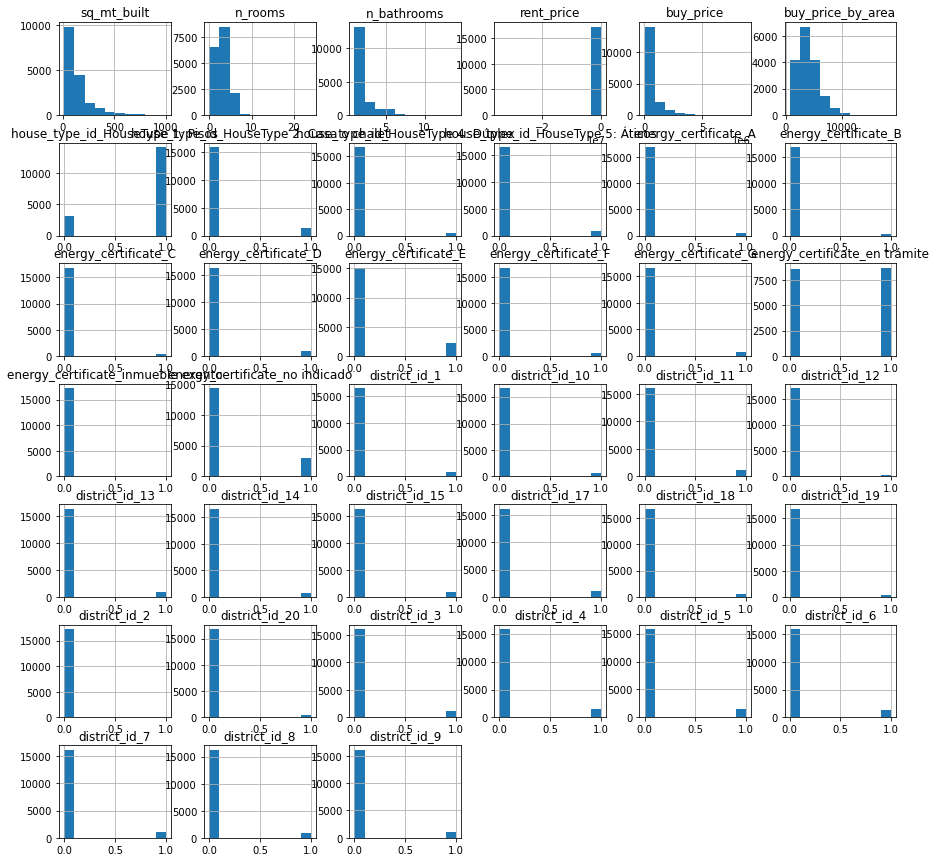

In [229]:
df_clean.hist(figsize = (15,15));

### Correlation & Multicollinearity

In [230]:
corr = df_clean.corr()
corr

,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area,is_renewal_needed,is_new_development,has_ac,has_fitted_wardrobes,...,district_id_19,district_id_2,district_id_20,district_id_3,district_id_4,district_id_5,district_id_6,district_id_7,district_id_8,district_id_9
sq_mt_built,1.000000,0.717548,0.851717,-0.247481,0.832089,0.185490,0.058264,-0.023571,0.143340,0.118667,...,-0.047973,0.004131,-0.070563,-0.130036,-0.056626,0.145684,0.036019,-0.070137,0.093389,0.176148
n_rooms,0.717548,1.000000,0.706724,-0.134894,0.586557,0.050920,0.181809,-0.055872,0.031141,0.083236,...,-0.026114,0.006771,-0.079533,-0.081758,-0.089795,0.116309,0.049450,-0.046262,0.091532,0.095646
n_bathrooms,0.851717,0.706724,1.000000,-0.169635,0.755507,0.278167,0.000594,0.026258,0.186908,0.157977,...,-0.029402,0.004152,-0.068272,-0.151434,-0.033207,0.133815,0.052978,-0.071470,0.104933,0.167294
rent_price,-0.247481,-0.134894,-0.169635,1.000000,-0.462872,-0.169234,0.000917,0.009474,-0.023641,-0.008206,...,0.009415,0.002315,0.010084,0.016135,0.011895,-0.091480,0.009520,0.015320,0.012759,-0.010013
buy_price,0.832089,0.586557,0.755507,-0.462872,1.000000,0.565483,0.050894,-0.015800,0.159973,0.111293,...,-0.081628,-0.006801,-0.094979,-0.161152,0.017127,0.234707,0.119438,-0.085158,0.016513,0.107745
buy_price_by_area,0.185490,0.050920,0.278167,-0.169234,0.565483,1.000000,-0.030402,0.044492,0.179144,0.115535,...,-0.132930,-0.013309,-0.139282,-0.240807,0.233081,0.238568,0.269385,-0.086677,-0.044672,-0.012315
is_renewal_needed,0.058264,0.181809,0.000594,0.000917,0.050894,-0.030402,1.000000,-0.127739,-0.226703,-0.114860,...,-0.050362,-0.014477,-0.055672,-0.016863,-0.014525,0.096918,0.063028,-0.004137,-0.037494,-0.049306
is_new_development,-0.023571,-0.055872,0.026258,0.009474,-0.015800,0.044492,-0.127739,1.000000,-0.212700,-0.224474,...,0.260983,-0.010490,0.044887,-0.005687,-0.059419,-0.035238,-0.023293,-0.003288,0.020148,0.073082
has_ac,0.143340,0.031141,0.186908,-0.023641,0.159973,0.179144,-0.226703,-0.212700,1.000000,0.356443,...,-0.096605,0.004826,0.002595,-0.065519,0.023921,0.038677,0.013187,-0.008637,0.029821,0.048465
has_fitted_wardrobes,0.118667,0.083236,0.157977,-0.008206,0.111293,0.115535,-0.114860,-0.224474,0.356443,1.000000,...,-0.079828,0.021270,0.007702,-0.069394,-0.025977,0.038242,0.041206,0.007086,0.038358,0.036199


In [231]:
# changing one column name for clarity 
df_clean.rename(columns={'buy_price_by_area':'buy_price_sq_mt'}, inplace=True)

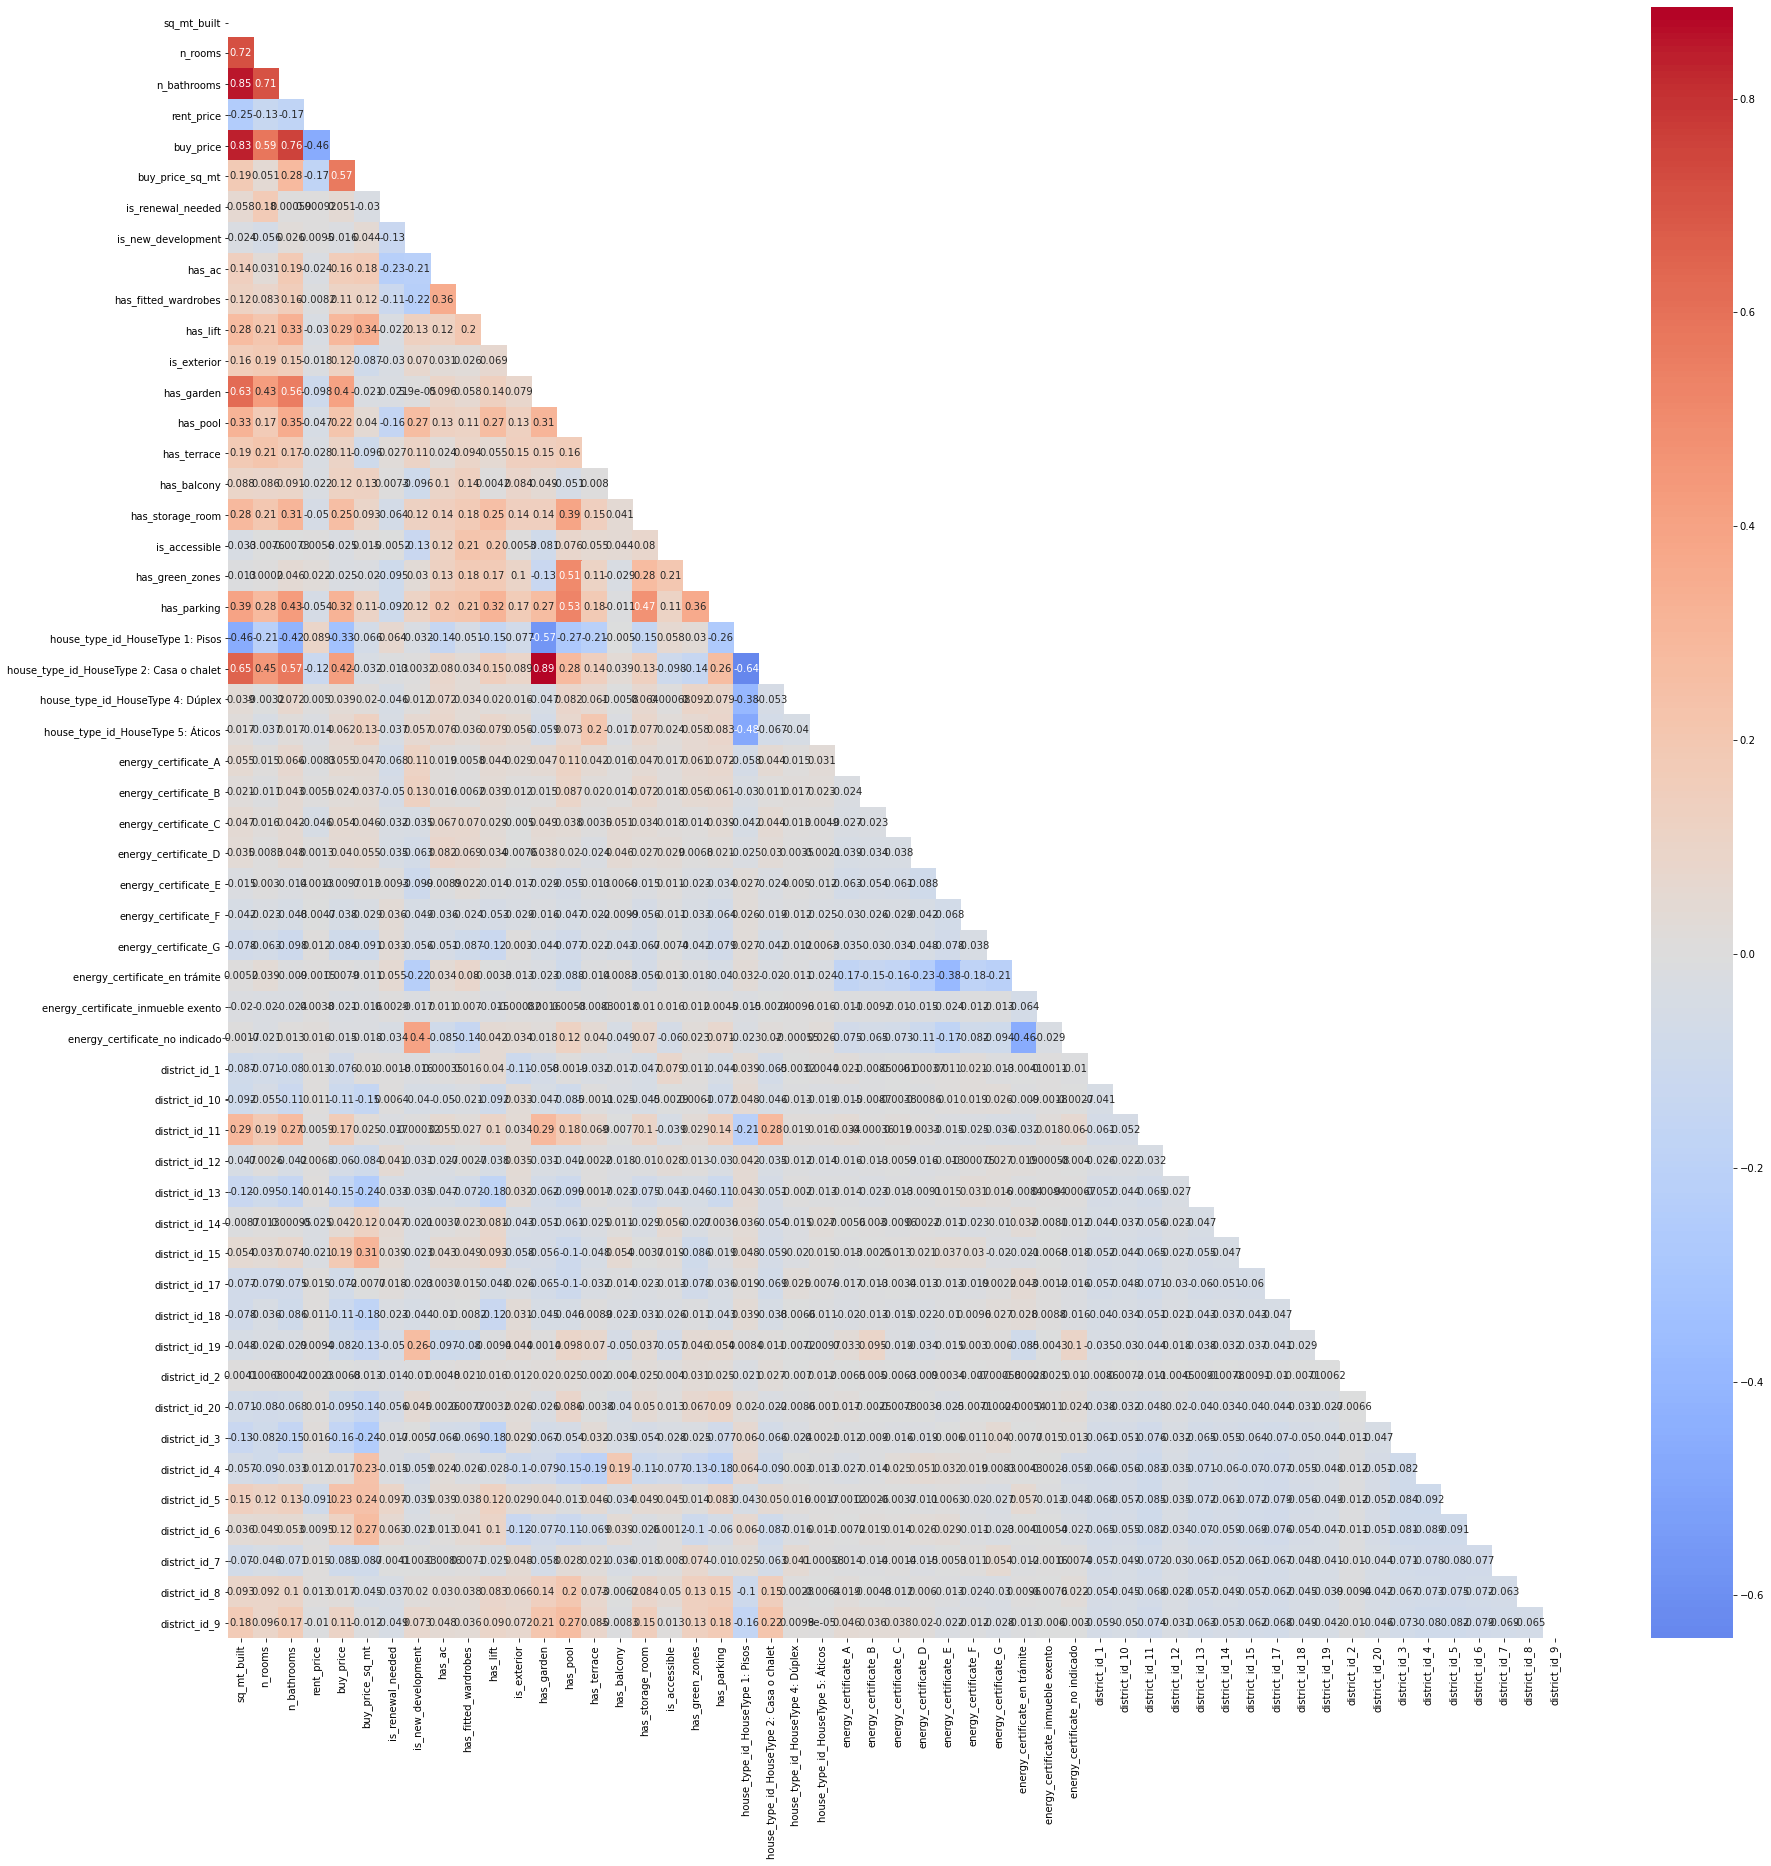

In [232]:
#visualization

fig, ax = plt.subplots(figsize=(30,30))

mask=np.zeros_like(df_clean.corr())

mask[np.triu_indices_from(mask)]=True

sns.heatmap(df_clean.corr(), mask=mask, annot=True, cmap='coolwarm', center=0)

plt.show()

### Linear regression model

In [195]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
import math 


In [233]:
#splitting off the dependant variable (label)
x=df_clean.drop(columns=['buy_price']) # X is all other columns 
y=df_clean['buy_price']

In [234]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [235]:
print(x.shape, x_test.shape, x_train.shape)

(17287, 52) (3458, 52) (13829, 52)


In [236]:
model.fit(x_train, y_train)

LinearRegression()

In [237]:
model.intercept_

-658502.4132945247

In [238]:
model.coef_

array([ 4.15134778e+03,  2.02493114e+04,  2.53526821e+04, -1.55975509e-01,
        1.90229387e+02,  2.45154767e+04, -5.80639298e+04, -1.67288758e+04,
       -2.08690738e+04, -6.39883226e+04,  5.46971528e+04, -7.83113876e+04,
       -6.96251452e+04,  3.34529759e+03,  4.87129956e+03,  1.84004973e+04,
        1.22317145e+03, -9.12299874e+03,  9.79472920e+02,  2.64327922e+04,
       -1.44908404e+05,  2.34088357e+04, -2.97274459e+03, -5.80399129e+03,
       -1.94500366e+03, -9.41640487e+03, -1.07150250e+04, -1.35593318e+04,
       -8.27057572e+03,  1.76301485e+04,  1.27100752e+03,  2.54518001e+04,
        5.35737621e+03, -2.02351006e+05, -6.08535381e+04, -2.92972414e+05,
       -1.07690966e+05, -3.97885748e+03, -2.48499106e+05, -2.37462777e+05,
       -2.12129356e+05, -4.74258032e+04, -3.68813136e+04, -1.65478200e+05,
       -2.37752126e+04, -4.15833152e+04, -3.23313001e+05, -2.03833056e+05,
       -2.87471137e+05, -1.42239162e+05, -2.07827095e+05, -1.64494296e+05])

In [239]:
predictions = model.predict(x_test)

In [240]:
predictions

array([1206698.88172364,   26263.50134884,   35609.21775268, ...,
       1438186.00065143, 1310068.77822822,  198367.97270089])

Assessing the accuracy of the results:
- mean absolute error
- mean squared error
- r2 Score

In [241]:
mean_absolute_error(y_test, predictions)

113927.92734557204

In [242]:
mean_squared_error(y_test, predictions)

36867060570.680336

In [243]:
np.sqrt(mean_squared_error(y_test, predictions))

192007.97007072475

In [245]:
df_clean['buy_price'].describe()

count    1.728700e+04
mean     6.339708e+05
std      7.496441e+05
min      3.600000e+04
25%      1.960000e+05
50%      3.699000e+05
75%      7.500000e+05
max      8.800000e+06
Name: buy_price, dtype: float64

In [246]:
6.339708e+05

633970.8

In [247]:
100*113927.92734557204/633970.8

17.9705322935334

In [248]:
r2_score(y_test, predictions)

0.9343633567160555

**Horray!! A pretty good r2 score!** 

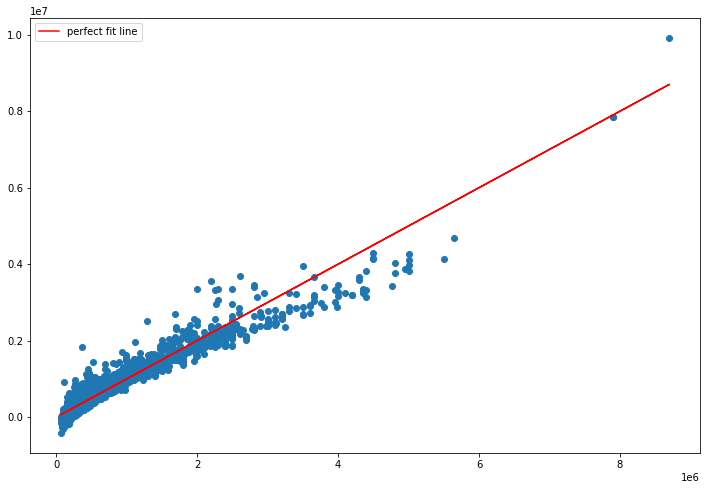

In [250]:
plt.figure(figsize=(12,8))

# My predictions
plt.scatter(y_test, predictions);

# Perfect predictions
plt.plot(y_test, y_test, color='r', label='perfect fit line')
plt.legend();

In [253]:
score = model.score(x_test, y_test)
print('Test accuracy (r2_score):',(score)*100)

Test accuracy (r2_score): 93.43633567160555


***Given that 70 is enough for a model to pass, 93.43 is a pretty good score I think.***

**<h1><center>Thanks a lot for reading! I hope you enjoyed it!</center></h1>**